import pandas as pd
data = pd.read_csv('csc2548_ml4h/adult_icu.gz', compression='gzip')

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from utils import *
from sklearn import preprocessing

In [2]:
data = pd.read_csv('csc2548_ml4h/adult_icu.gz', compression='gzip')

In [3]:
data

,subject_id,hadm_id,icustay_id,age,mort_icu,first_hosp_stay,first_icu_stay,adult_icu,eth_asian,eth_black,...,phosphate,platelet,potassium,ptt,inr,pt,sodium,bun,wbc,train
0,3,145834,211552,76.0,0,1,1,1,0,0,...,4.8,282.0,5.4,30.7,1.3,13.5,136.0,53.0,12.7,1
1,6,107064,228232,65.0,0,1,1,1,0,0,...,8.5,315.0,5.4,139.0,1.4,14.6,138.0,62.0,10.6,1
2,9,150750,220597,41.0,1,1,1,1,0,0,...,2.9,258.0,2.8,21.7,1.1,12.7,140.0,16.0,7.5,1
3,12,112213,232669,72.0,0,1,1,1,0,0,...,6.6,156.0,4.9,55.2,1.7,15.9,138.0,28.0,8.4,1
4,13,143045,263738,39.0,0,1,1,1,0,0,...,3.9,216.0,3.5,44.1,1.2,13.7,139.0,13.0,16.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27343,99982,112748,275958,65.0,0,0,1,1,0,0,...,3.9,140.0,3.4,37.8,2.5,26.5,140.0,36.0,5.4,0
27344,99982,183791,239827,65.0,0,0,1,1,0,0,...,2.3,163.0,3.8,34.3,1.3,13.9,131.0,42.0,7.1,0
27345,99985,176670,279638,53.0,0,1,1,1,0,0,...,2.2,250.0,3.9,47.7,1.1,12.5,136.0,13.0,12.6,0
27346,99991,151118,226241,47.0,0,1,1,1,0,0,...,2.3,188.0,3.4,27.8,1.0,12.1,143.0,26.0,4.2,0


In [4]:
drop_cols = ['train', 'subject_id', 'hadm_id', 'icustay_id', 'mort_icu']
binary_cols = ['first_hosp_stay', 'first_icu_stay', 'adult_icu', 'eth_asian', 'eth_black', 'eth_hispanic', 'eth_other', 'eth_white', 'admType_ELECTIVE', 'admType_EMERGENCY', 'admType_NEWBORN', 'admType_URGENT']

In [5]:
 #normalize to range 0-1
for col in data.columns:
    if ((col not in binary_cols) and (col not in drop_cols)):
        data[col] = (data[col] - data[col].min())/(data[col].max() - data[col].min())

In [6]:
data

,subject_id,hadm_id,icustay_id,age,mort_icu,first_hosp_stay,first_icu_stay,adult_icu,eth_asian,eth_black,...,phosphate,platelet,potassium,ptt,inr,pt,sodium,bun,wbc,train
0,3,145834,211552,0.821918,0,1,1,1,0,0,...,0.264706,0.121119,0.333333,0.131732,0.020305,0.038732,0.530612,0.191882,0.020997,1
1,6,107064,228232,0.671233,0,1,1,1,0,0,...,0.482353,0.135549,0.333333,0.919942,0.022843,0.046479,0.551020,0.225092,0.017497,1
2,9,150750,220597,0.342466,1,1,1,1,0,0,...,0.152941,0.110625,0.126984,0.066230,0.015228,0.033099,0.571429,0.055351,0.012331,1
3,12,112213,232669,0.767123,0,1,1,1,0,0,...,0.370588,0.066025,0.293651,0.310044,0.030457,0.055634,0.551020,0.099631,0.013831,1
4,13,143045,263738,0.315068,0,1,1,1,0,0,...,0.211765,0.092261,0.182540,0.229258,0.017766,0.040141,0.561224,0.044280,0.027495,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27343,99982,112748,275958,0.671233,0,0,1,1,0,0,...,0.211765,0.059029,0.174603,0.183406,0.050761,0.130282,0.571429,0.129151,0.008832,0
27344,99982,183791,239827,0.671233,0,0,1,1,0,0,...,0.117647,0.069086,0.206349,0.157933,0.020305,0.041549,0.479592,0.151292,0.011665,0
27345,99985,176670,279638,0.506849,0,1,1,1,0,0,...,0.111765,0.107127,0.214286,0.255459,0.015228,0.031690,0.530612,0.044280,0.020830,0
27346,99991,151118,226241,0.424658,0,1,1,1,0,0,...,0.117647,0.080017,0.174603,0.110626,0.012690,0.028873,0.602041,0.092251,0.006832,0


In [7]:
X_train = data[data['train'] == 1]
X_test = data[data['train'] == 0]
y_train = X_train['mort_icu']
y_test = X_test['mort_icu']

X_train = X_train.drop(drop_cols, axis=1)
X_test = X_test.drop(drop_cols, axis=1)

In [8]:
clf = LogisticRegression(penalty = 'l2', max_iter=500, solver='lbfgs')
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_predict = clf.predict(X_test)
y_predict_prob = clf.predict_proba(X_test)

# comment on model performance
print("Score on training set: ", clf.score(X_train,y_train))
print("Score on testing set: ", clf.score(X_test,y_test))
print("Accuracy score:",metrics.accuracy_score(y_test, y_predict))
print("No. of iterations to converge: ", clf.n_iter_)

Score on training set:  0.9056929269695227
Score on testing set:  0.9058279596057914
Accuracy score: 0.9058279596057914
No. of iterations to converge:  [242]


In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label = 1)    #[:,1]: the first column

The threshod is:  [1.98632449 0.98632449 0.85836214 ... 0.0101078  0.01008649 0.00215976]
AUC score:  0.7653165425420847


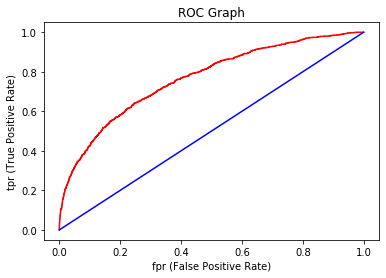

In [11]:
plot_roc(fpr, tpr, "4a_roc_graph.png")
print("The threshod is: ", thresholds)
print("AUC score: ", metrics.roc_auc_score(y_test, y_predict_prob[:,1]))

In [12]:
risk_factors(X_train.columns, clf.coef_)

All feature coefficients with signs: 
[[1.023671969456406, 'age'], [0.10053096566288583, 'first_hosp_stay'], [-0.13625273667916063, 'first_icu_stay'], [0.012526061499588978, 'adult_icu'], [-0.004676882308203735, 'eth_asian'], [-0.1847528440113108, 'eth_black'], [-0.4013445640192856, 'eth_hispanic'], [0.5625592193313363, 'eth_other'], [0.040741132507079135, 'eth_white'], [-0.74873427184475, 'admType_ELECTIVE'], [0.4811584842188535, 'admType_EMERGENCY'], [0.0, 'admType_NEWBORN'], [0.280101849125522, 'admType_URGENT'], [-0.9723011256223312, 'heartrate_min'], [1.7764747733063142, 'heartrate_max'], [1.078992038200697, 'heartrate_mean'], [-2.0508478371949503, 'sysbp_min'], [0.7109882164953113, 'sysbp_max'], [-0.9969299939771001, 'sysbp_mean'], [0.4995447653474141, 'diasbp_min'], [-1.5855075456092582, 'diasbp_max'], [-0.8998524232898572, 'diasbp_mean'], [-1.0357257893537966, 'meanbp_min'], [0.3348208845681865, 'meanbp_max'], [1.412616199353262, 'meanbp_mean'], [-0.041712429709247115, 'resprat